<h2><center>Lab 2 - Probability and Statistics</center><h2>
<h4><center>Submission by Chitrank Dave (8938766)</center></h4>

> ### **Part A**

In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats
import matplotlib.pyplot as plt

---
#### Preprocessing
- Load the dataset

- Use the CountVectorizer function in sklearn to transform the "text" feature to a vector representation of a predetermined size.

- Split the dataset into training and testing.

In [109]:
# Load the dataset
lab2DataSet = pd.read_csv(
    "../../practical_labs/datasets/Lab_2/Lab2_dataset.csv")
abNycDataset = pd.read_csv(
    "../../practical_labs/datasets/Lab_2/AB_NYC_2019.csv")

In [110]:
print(lab2DataSet.describe())
lab2DataSet

        Unnamed: 0    label_num
count  5171.000000  5171.000000
mean   2585.000000     0.289886
std    1492.883452     0.453753
min       0.000000     0.000000
25%    1292.500000     0.000000
50%    2585.000000     0.000000
75%    3877.500000     1.000000
max    5170.000000     1.000000


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [111]:
textFeature = lab2DataSet['text']

textFeature

0       Subject: enron methanol ; meter # : 988291\nth...
1       Subject: hpl nom for january 9 , 2001\n( see a...
2       Subject: neon retreat\nho ho ho , we ' re arou...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\nthis deal is to ...
                              ...                        
5166    Subject: put the 10 on the ft\nthe transport v...
5167    Subject: 3 / 4 / 2000 and following noms\nhpl ...
5168    Subject: calpine daily gas nomination\n>\n>\nj...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\ndear ...
Name: text, Length: 5171, dtype: object

In [112]:
# Use the CountVectorizer function in sklearn to transform the "text" feature to a vector representation of a predetermined size.
countVectorizer = CV()

# Transform the "text" feature into a vector representation
textFeatureVectorized = countVectorizer.fit_transform(textFeature)
countVectorizer

CountVectorizer()

In [113]:
# Split the dataset into training and testing.
labelFeature = lab2DataSet['label']
textTrain, textTest, labelTrain, labelTest = train_test_split(
    textFeatureVectorized, labelFeature, train_size=0.8)

textTrain

<4136x50447 sparse matrix of type '<class 'numpy.int64'>'
	with 368493 stored elements in Compressed Sparse Row format>

---
#### Model Training and Evaluation

- Train the Sklearn SVC model on the training dataset and evaluate on the test set

- Train and evaluate also on the Gaussian and Multinomial Naiive Bayes Classifiers

- Compare between the performance of all models and comment on the reasons behind the differences seen between the three models.

In [114]:
# Train the Sklearn SVC model on the training dataset
svcModel = SVC()
svcModel.fit(textTrain, labelTrain)

SVC()

In [115]:
# evaluate SVC model on the test set
svcPredict = svcModel.predict(textTest)
svcPredict

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [116]:
# Train the Gaussian Naiive Bayes model on training dataset
gaussianModel = GaussianNB()
gaussianModel.fit(textTrain.toarray(), labelTrain)

GaussianNB()

In [117]:
# evaluate Gaussian Naiive Bayes model on the test set
gaussianModelPredict = gaussianModel.predict(textTest.toarray())
gaussianModelPredict

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

In [118]:
# Train the Multinomial Naiive Bayes model on training dataset
multinomialModel = MultinomialNB()
multinomialModel.fit(textTrain, labelTrain)

MultinomialNB()

In [119]:
# evaluate Multinomial Naiive Bayes model on the test set
multinomialModelPredict = multinomialModel.predict(textTest)
multinomialModelPredict

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

In [120]:
# Compare between the performance of all models and comment on the reasons behind the differences seen between the three models.

print("---Model Accuracy---")
print("SVC Model                        :",
      accuracy_score(labelTest, svcPredict))
print("Gaussian Naiive Bayes Model      :",
      accuracy_score(labelTest, gaussianModelPredict))
print("Multinomial Naiive Bayes Model   :",
      accuracy_score(labelTest, multinomialModelPredict))

print("\n\n---Model Confusion Matrix---")
print("SVC Model                        :\n",
      confusion_matrix(labelTest, svcPredict))
print("\nGaussian Naiive Bayes Model      :\n",
      confusion_matrix(labelTest, gaussianModelPredict))
print("\nMultinomial Naiive Bayes Model   :\n",
      confusion_matrix(labelTest, multinomialModelPredict))

---Model Accuracy---
SVC Model                        : 0.9710144927536232
Gaussian Naiive Bayes Model      : 0.966183574879227
Multinomial Naiive Bayes Model   : 0.9835748792270531


---Model Confusion Matrix---
SVC Model                        :
 [[699  19]
 [ 11 306]]

Gaussian Naiive Bayes Model      :
 [[715   3]
 [ 32 285]]

Multinomial Naiive Bayes Model   :
 [[712   6]
 [ 11 306]]


 - **The Multinomial Naive Bayes model is the best model for classifying spam emails because it is suitably designed to work with text data.**
 - **The SVC model also works well because it is a versatile model that can be used for a variety of tasks, including text classification.** 
 - **Gaussian Naive Bayes is a good general-purpose classifier, but it may not be the best choice for this specific task because it makes assumptions about the distribution of the data that may not be true for spam emails.**

---
> ### **Part B**

In [121]:
# Dataset
print(abNycDataset.describe())
abNycDataset.head()

                 id       host_id      latitude     longitude         price   
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000  \
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month   
count    48895.000000       48895.000000       38843.000000  \
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Tasks
- Remove outliers based on price per night for a given apartment/home.

- Compare the Z-score approach and the whiskers approach in terms of who is better to remove the outliers in this case.

In [125]:
zScores = np.abs(stats.zscore(abNycDataset['price']))
zScoreThreshold = 3.0

outlierMaskZscore = zScores > zScoreThreshold

cleanedDataZscore = abNycDataset[~outlierMaskZscore]

print("Total rows with zscore outliers:", cleanedDataZscore.size)
cleanedDataZscore.head()


Total rows with zscore outliers: 776112


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [123]:
q1 = abNycDataset['price'].quantile(0.25)
q3 = abNycDataset['price'].quantile(0.75)
iqr = q3 - q1

upperBound = q3 + 1.5 * iqr
lowerBound = q1 - 1.5 * iqr

outlierMaskWhiskers = (abNycDataset['price'] < lowerBound) | (abNycDataset['price'] > upperBound)

cleanedDataWhiskers = abNycDataset[~outlierMaskWhiskers]

print("Total rows in cleaned data Whiskers (Without outliers):", cleanedDataWhiskers.size)
cleanedDataWhiskers.head()


Total rows in cleaned data Whiskers (Without outliers): 734768


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


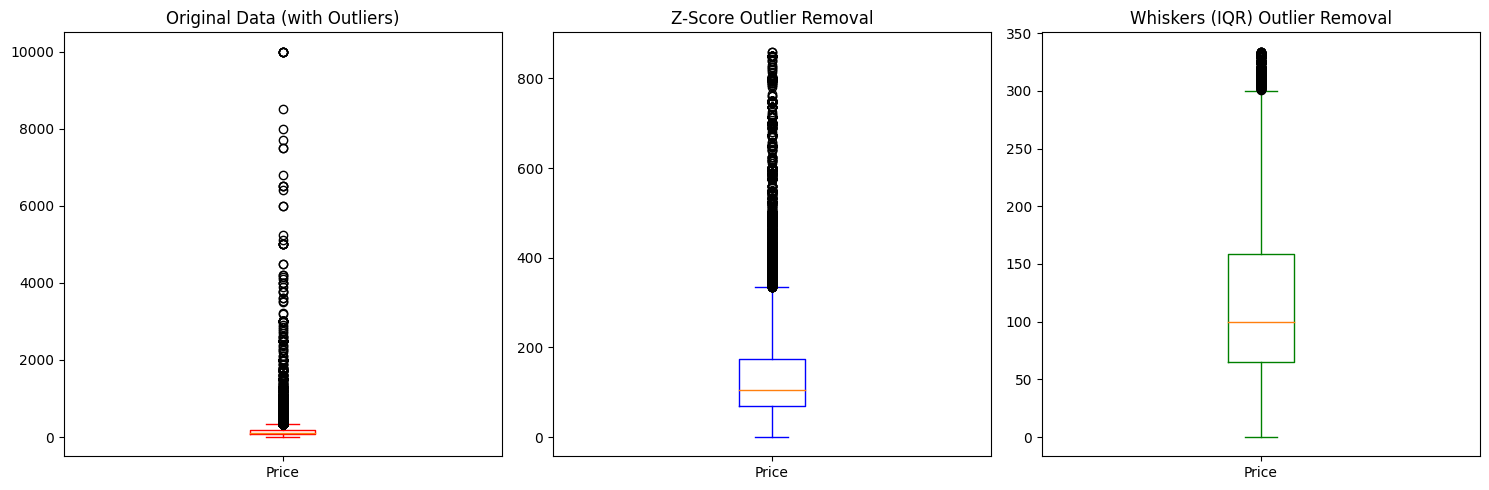

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

originalColor = 'red'
zscoreColor = 'blue'
whiskersColor = 'green'

axes[0].boxplot(abNycDataset['price'], boxprops={'color': originalColor}, whiskerprops={'color': originalColor},
                capprops={'color': originalColor})
axes[0].set_title('Original Data (with Outliers)')

axes[1].boxplot(cleanedDataZscore['price'], boxprops={'color': zscoreColor}, whiskerprops={'color': zscoreColor},
                capprops={'color': zscoreColor})
axes[1].set_title('Z-Score Outlier Removal')

axes[2].boxplot(cleanedDataWhiskers['price'], boxprops={'color': whiskersColor}, whiskerprops={'color': whiskersColor},
                capprops={'color': whiskersColor})
axes[2].set_title('Whiskers (IQR) Outlier Removal')

for ax in axes:
    ax.set_xticklabels(['Price'])

plt.tight_layout()
plt.show()